In [1]:
# Import libraries
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Widen jupyter notebook cells
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Show all columns in the head command
pd.set_option('display.max_columns', None)

In [3]:
# Load data from the csv file into a DataFrame and save in a variable
df = pd.read_csv("titles.csv")

In [5]:
df.head(len(df))

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,NaN,NaN,NaN,1.296,10.000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [ ]:
# id: The title ID on JustWatch.
# title: The name of the title.
# show_type: TV show or movie.
# description: A brief description.
# release_year: The release year.
# age_certification: The age certification.
# runtime: The length of the episode (SHOW) or movie.
# genres: A list of genres.
# production_countries: A list of countries that produced the title.
# seasons: Number of seasons if it's a SHOW.
# imdb_id: The title ID on IMDB.
# imdb_score: Score on IMDB.
# imdb_votes: Votes on IMDB.
# tmdb_popularity: Popularity on TMDB.
# tmdb_score: Score on TMDB.

In [8]:
# Dealing with missing data
df.isnull().any()

id                      False
title                    True
type                    False
description              True
release_year            False
age_certification        True
runtime                 False
genres                  False
production_countries    False
seasons                  True
imdb_id                  True
imdb_score               True
imdb_votes               True
tmdb_popularity          True
tmdb_score               True
dtype: bool

In [17]:
# Create a new df of just the rows that are missing data
df_null_geo = df[pd.isnull(df.tmdb_score)]
df_null_geo.head(len(df))

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
56,tm721687,Vaashi,MOVIE,"Ebin Mathew, a budding lawyer ambitiously join...",1983,NaN,123,"['drama', 'thriller']",['IN'],NaN,tt13913068,6.7,388.0,3.790,NaN
79,tm342996,Duniya,MOVIE,Mohan Kumar's diligence and honesty lands him ...,1984,NaN,170,"['action', 'drama']",['IN'],NaN,tt0301231,6.3,245.0,1.394,NaN
83,ts63001,High Risk,SHOW,High Risk is a program aired by the CBS televi...,1988,TV-PG,50,['comedy'],['US'],1.0,tt5944220,3.8,6.0,1.400,NaN
84,tm311264,Muqaddar Ka Faisla,MOVIE,"Muqaddar ka Faisla, is the story of Pandit Kri...",1987,NaN,172,"['action', 'comedy', 'drama', 'family']",['IN'],NaN,tt0239682,4.8,69.0,2.236,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5839,tm1165179,Kongsi Raya,MOVIE,Jack - a Chinese chef-manager who is in-line t...,2022,NaN,102,['comedy'],['MY'],NaN,tt16806990,7.0,66.0,2.112,NaN
5841,tm985215,Princess 'Daya'Reese,MOVIE,Reese is a con artist from Manila who dreams o...,2021,NaN,115,"['comedy', 'romance']",['PH'],NaN,tt13399802,7.1,50.0,1.383,NaN
5844,tm1074617,Bling Empire - The Afterparty,MOVIE,"The stars of ""Bling Empire"" discuss the show's...",2021,NaN,35,[],['US'],NaN,NaN,NaN,NaN,NaN,NaN
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN


In [ ]:
# title has one missing value (index=1704)
# description has 18 missing values
# age_certification has 2619 missing values
# seasons has 3744 missing values
# imdb_id has 403 missing values
# imdb_score has 482 missing values
# imdb_votes has 498 missing values
# tmdb_popularity has 91 missing values
# tmdb_score has 311 missing values

Text(0, 0.5, '')

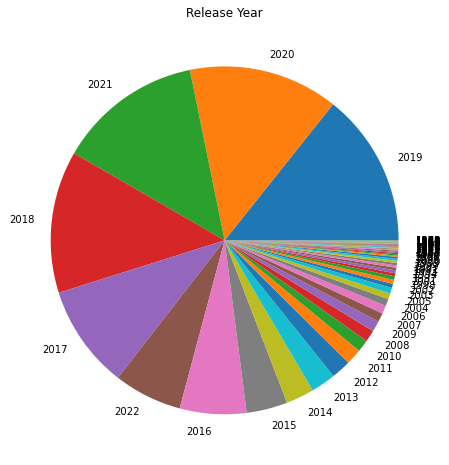

In [21]:
plt.figure(figsize=(12,8));

services = df['release_year'].value_counts()
services.plot(kind='pie')

plt.title('Release Year')
plt.ylabel("")

array([[<AxesSubplot:title={'center':'release_year'}>]], dtype=object)

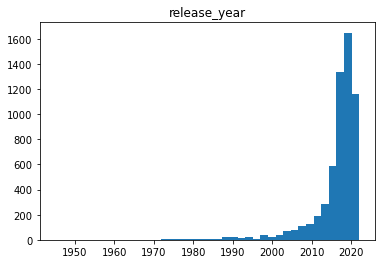

In [22]:
df.hist(['release_year'], bins=40, grid=False)